### Creating the first function

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def test_strategy(stock, start, end, SMA):
    df = yf.download(stock, start = start, end = end)
    data = df.Close.to_frame()
    data["ret"] = np.log(data.Close.div(data.Close.shift(1)))
    data["SMA_S"] = data.Close.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.Close.rolling(int(SMA[1])).mean()
    data.dropna(inplace=True)
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data["ret"] * data.position.shift(1)
    data.dropna(inplace=True)
    ret = np.exp(data["strategy"].sum())
    std = data["strategy"].std() * np.sqrt(252)
    
    return ret, std

In [7]:
test_strategy("MSFT", "2000-01-01", "2022-01-01", (50,200))

[*********************100%***********************]  1 of 1 completed


(0.8338252849495885, 0.2962800002061495)

In [8]:
test_strategy("AAPL", "2000-01-01", "2022-01-01", (50,200))

[*********************100%***********************]  1 of 1 completed


(40.00769534684998, 0.36774097160153246)

In [9]:
test_strategy("TSLA", "2000-01-01", "2022-01-01", (50,200))

[*********************100%***********************]  1 of 1 completed


(14.191947326135796, 0.5507932733833235)

### Creating the first class

In [10]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        df = yf.download(self.symbol, start = self.start , end = self.end)
        data = df.Close.to_frame()
        data["ret"] = np.log(data.Close.div(data.Close.shift(1)))
        data["SMA_S"] = data.Close.rolling(self.SMA_S).mean()
        data["SMA_L"] = data.Close.rolling(self.SMA_L).mean()
        data.dropna(inplace=True)
        self.data2 = data
        
        return data
    
    def test_results(self):
        data = self.data2.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["ret"] * data.position.shift(1)
        data.dropna(inplace=True)
        data["ret_b&h"] = data["ret"].cumsum().apply(np.exp)
        data["ret_strategy"] = data["strategy"].cumsum().apply(np.exp)
        
        performance = data["ret_strategy"].iloc[-1]
        out_performance = performance - data["ret_b&h"].iloc[-1]
        self.results = data
        
        ret = np.exp(data["strategy"].sum())
        std = data["strategy"].std() * np.sqrt(252)

        return round(performance,6), round(out_performance,6)
    
    def plot_results(self):
        if self.results is None:
            print("Run the test!")
        else:
            title = "{}\ SMA_S={} SMA_L={}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["ret_b&h", "ret_strategy"]].plot(title=title, figsize=(15,8), fontsize=15)
            plt.show()                

In [11]:
tester = SMABacktester("SPY", 50, 100, "2000-01-01", "2022-01-01")

[*********************100%***********************]  1 of 1 completed


In [12]:
tester.test_results()

(2.276756, -1.109768)

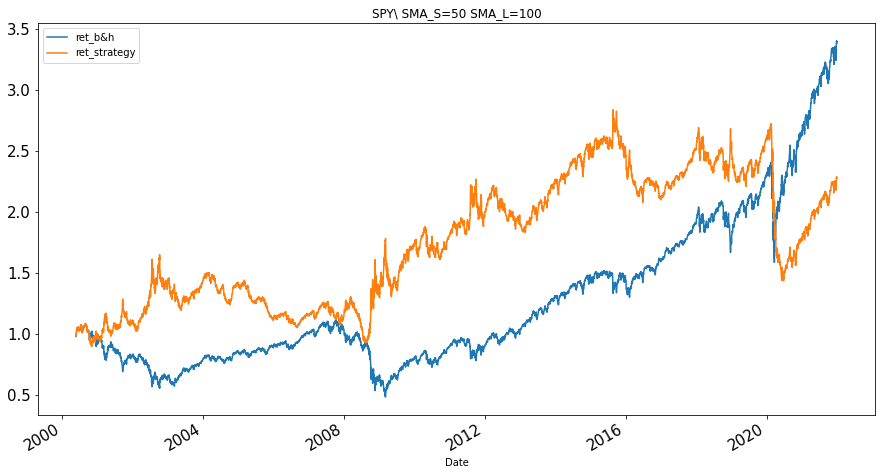

In [13]:
tester.plot_results()